In [17]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
import random

In [7]:
func = lambda x: np.cos(14.5 * x - 0.3) + (x + 0.2) * x
x0=[1.]

minimizer_kwargs = {"method": "BFGS"}
ret = optimize.basinhopping(func, x0, minimizer_kwargs=minimizer_kwargs,
                    niter=200)

print("global minimum: x = %.4f, f(x0) = %.4f" % (ret.x, ret.fun))

global minimum: x = -0.1951, f(x0) = -1.0009


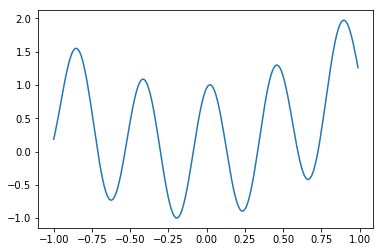

In [133]:
xp = np.arange(-1, 1, 0.01)
yp = func(xp)
plt.plot(xp, yp)
plt.show()

In [272]:
# Find the minimum using simulated annealing algorithm.
def sa_opt(func, init_guess, T_max, T_min, step_size, max_iter, eps):
    x = np.copy(init_guess)
    T = np.copy(T_max)
    Tfactor = -np.log(T_max / T_min)
    x_his = []
    x_his.append(x)
    
    for i in range(max_iter):
        #if step_size > 0.01:
        #    step_size = step_size * 0.9999
        current = func(x)
        x_new = x + step_size * (np.random.uniform(0, 1, len(x)) - 0.5) * 2
        proposal = func(x_new)
        if proposal < current or np.exp(-(proposal - current) / T) > random.random():
            x = x_new
        T = T_max * np.exp(Tfactor * i / max_iter)
        x_his.append(x)
        
        if i > 200:
            if np.max(np.abs(np.array(x_his)[-200:] - np.array(x_his)[-200])) < eps:
                break 
        
        #print(x)
    print(i)
    return x, func(x), x_his

In [216]:
func = lambda x: np.cos(14.5 * x - 0.3) + (x + 0.2) * x
init_guess = 5
T_max = 1000
T_min = 0.01
step_size = 1.5
max_iter = 20000
eps = 1e-7

x_opt, y_opt, x_his = sa_opt(func, init_guess, T_max, T_min, step_size, max_iter, eps)

17124


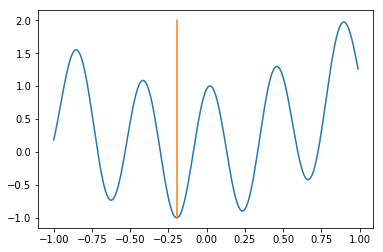

In [217]:
xp = np.arange(-1, 1, 0.01)
yp = func(xp)
plt.plot(xp, yp)

plt.plot([x_opt,x_opt], [-1,2])
plt.show()

In [218]:
x_his[-500:]

[-0.22038381473252067,
 -0.22038381473252067,
 -0.22038381473252067,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.19700322365741085,
 -0.1970032

In [246]:
# def func2d(x):
#     f = np.cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] +
#                                                         0.2) * x[0]
#     df = np.zeros(2)
#     #print(x[0])
#     df[0] = -14.5 * np.sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
#     df[1] = 2. * x[1] + 0.2
#     return f, df

def func2d(x):
    f = np.cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] +
                                                        0.2) * x[0]
    return f

xv = np.linspace(-1,1,1000)
yv = np.linspace(-1,1,1000)
zp = np.zeros((len(xv), len(yv)))
for i in range(len(xv)):
    for j in range(len(yv)):
        zp[i, j] = func2d([xv[i], yv[j]])

xp, yp = np.meshgrid(np.linspace(-1,1,1000), np.linspace(-1,1,1000))


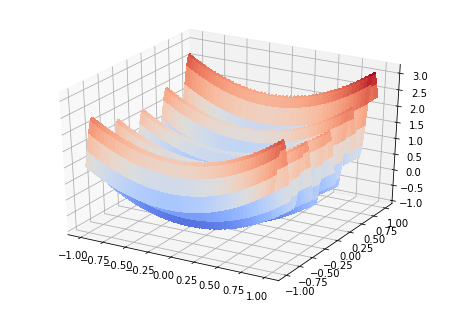

In [239]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(xp, yp, zp, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

In [268]:
def func2d_scipy(x):
    f = np.cos(14.5 * x[0] - 0.3) + (x[1] + 0.2) * x[1] + (x[0] +
                                                           0.2) * x[0]
    df = np.zeros(2)
    df[0] = -14.5 * np.sin(14.5 * x[0] - 0.3) + 2. * x[0] + 0.2
    df[1] = 2. * x[1] + 0.2
    return f, df

minimizer_kwargs = {"method":"L-BFGS-B", "jac":True}
x0 = [1.0, 1.0]
ret = optimize.basinhopping(func2d_scipy, x0, minimizer_kwargs=minimizer_kwargs,
                   niter=200)
ret.x[0], ret.x[1], ret.fun

(-0.19506755255585626, -0.09999999955630172, -1.0108761844426555)

In [313]:
#func = lambda x: np.cos(14.5 * x - 0.3) + (x + 0.2) * x
init_guess = np.array([1.0,1.0])
T_max = 1000
T_min = 0.01
step_size = 1
max_iter = 10000
eps = 1e-7

x_opt, y_opt, x_his = sa_opt(func2d, init_guess, T_max, T_min, step_size, max_iter, eps)

8526
[-0.19659857 -0.21713422]
[-0.19659857 -0.21713422]


In [280]:
x_opt, y_opt

(array([-0.18335218,  0.16239186]), -0.9275076539705914)

In [321]:
fig = plt.figure()
ax = Axes3D(fig)

surf = ax.plot_surface(xp, yp, zp, cmap=plt.cm.coolwarm,
                       linewidth=0, antialiased=False)

x_opt_p = np.ones((1000,1))*x_opt
scatter = ax.scatter(x_opt_p[:,0], x_opt_p[:,1], np.linspace(-1,3,1000),linewidth=1)
#ax.view_init(0,0)
ax.view_init(0,90)
plt.show()